In [ ]:
import os
from tqdm import tqdm

# Path to your text descriptions folder
text_folder = './texts'

# Path to save the processed text descriptions
output_folder = './processed_texts'
os.makedirs(output_folder, exist_ok=True)

def extract_longest_line(text):
    # Split text into lines and strip whitespace
    lines = text.splitlines()
    lines = [line.strip() for line in lines if line.strip()]
    # Return the longest line
    if lines:
        return max(lines, key=len)
    return ""

# List all text files in the folder
text_files = [f for f in os.listdir(text_folder) if f.endswith('.txt')]

# Process each file with a progress bar
for filename in tqdm(text_files, desc="Processing files", unit="file"):
    file_path = os.path.join(text_folder, filename)
    with open(file_path, 'r') as file:
        content = file.read()
        longest_line = extract_longest_line(content)
    
    # Save the longest line to a new file
    output_path = os.path.join(output_folder, filename)
    with open(output_path, 'w') as output_file:
        output_file.write(longest_line)

print(f"Longest descriptions saved in {output_folder}")


In [ ]:
import os
import shutil

# Paths to the folders
image_folder = './images'
sketch_folder = './sketches'
text_folder = './processed_texts'

# Path to save the subset
output_folder = './subset'
output_images = os.path.join(output_folder, 'images')
output_sketches = os.path.join(output_folder, 'sketches')
output_texts = os.path.join(output_folder, 'processed_texts')

# Create directories for the subset
os.makedirs(output_images, exist_ok=True)
os.makedirs(output_sketches, exist_ok=True)
os.makedirs(output_texts, exist_ok=True)

# Get sorted file IDs (assuming filenames are sequential numbers)
file_ids = sorted([f.split('.')[0] for f in os.listdir(image_folder) if f.endswith('.jpg')])[:6000]

# Copy the selected files to the new subset folder
for file_id in file_ids:
    # Copy image
    shutil.copy(os.path.join(image_folder, f"{file_id}.jpg"), os.path.join(output_images, f"{file_id}.jpg"))
    # Copy sketch
    shutil.copy(os.path.join(sketch_folder, f"{file_id}.jpg"), os.path.join(output_sketches, f"{file_id}.jpg"))
    # Copy text description
    shutil.copy(os.path.join(text_folder, f"{file_id}.txt"), os.path.join(output_texts, f"{file_id}.txt"))

print(f"Subset of the first 6000 items created in {output_folder}")


In [ ]:
import os
import csv

# Paths to the subset folders
subset_folder = './subset'
image_folder = os.path.join(subset_folder, 'images')
sketch_folder = os.path.join(subset_folder, 'sketches')
text_folder = os.path.join(subset_folder, 'processed_texts')

# Path to save the dataset CSV
output_csv = os.path.join(subset_folder, 'metadata.csv')

# Get a sorted list of file IDs (assuming filenames are sequential numbers)
file_ids = sorted([f.split('.')[0] for f in os.listdir(image_folder) if f.endswith('.jpg')])

# Create the dataset CSV
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Write the header
    csvwriter.writerow(['Image Filename', 'Sketch Filename', 'Text Description'])

    # Write data for each file ID
    for file_id in file_ids:
        image_filename = f"{file_id}.jpg"
        sketch_filename = f"{file_id}.jpg"
        text_filepath = os.path.join(text_folder, f"{file_id}.txt")
        
        # Read the text description
        with open(text_filepath, 'r') as txtfile:
            text_description = txtfile.read().strip()
        
        # Write the row to the CSV
        csvwriter.writerow([image_filename, sketch_filename, text_description])

print(f"Dataset CSV created at {output_csv}")


In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Path to the CSV file
csv_file = './subset/metadata.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(csv_file)

df.head()

Image Filename Sketch Filename  \
0          0.jpg           0.jpg   
1          1.jpg           1.jpg   
2         10.jpg          10.jpg   
3        100.jpg         100.jpg   
4       1000.jpg        1000.jpg   

                                    Text Description  
0  The person has big lips, wavy hair, arched eye...  
1  This person has arched eyebrows, wavy hair, an...  
2  This man is chubby and has oval face, big nose...  
3  This person is attractive and has wavy hair, b...  
4  This man has double chin, bags under eyes, big...

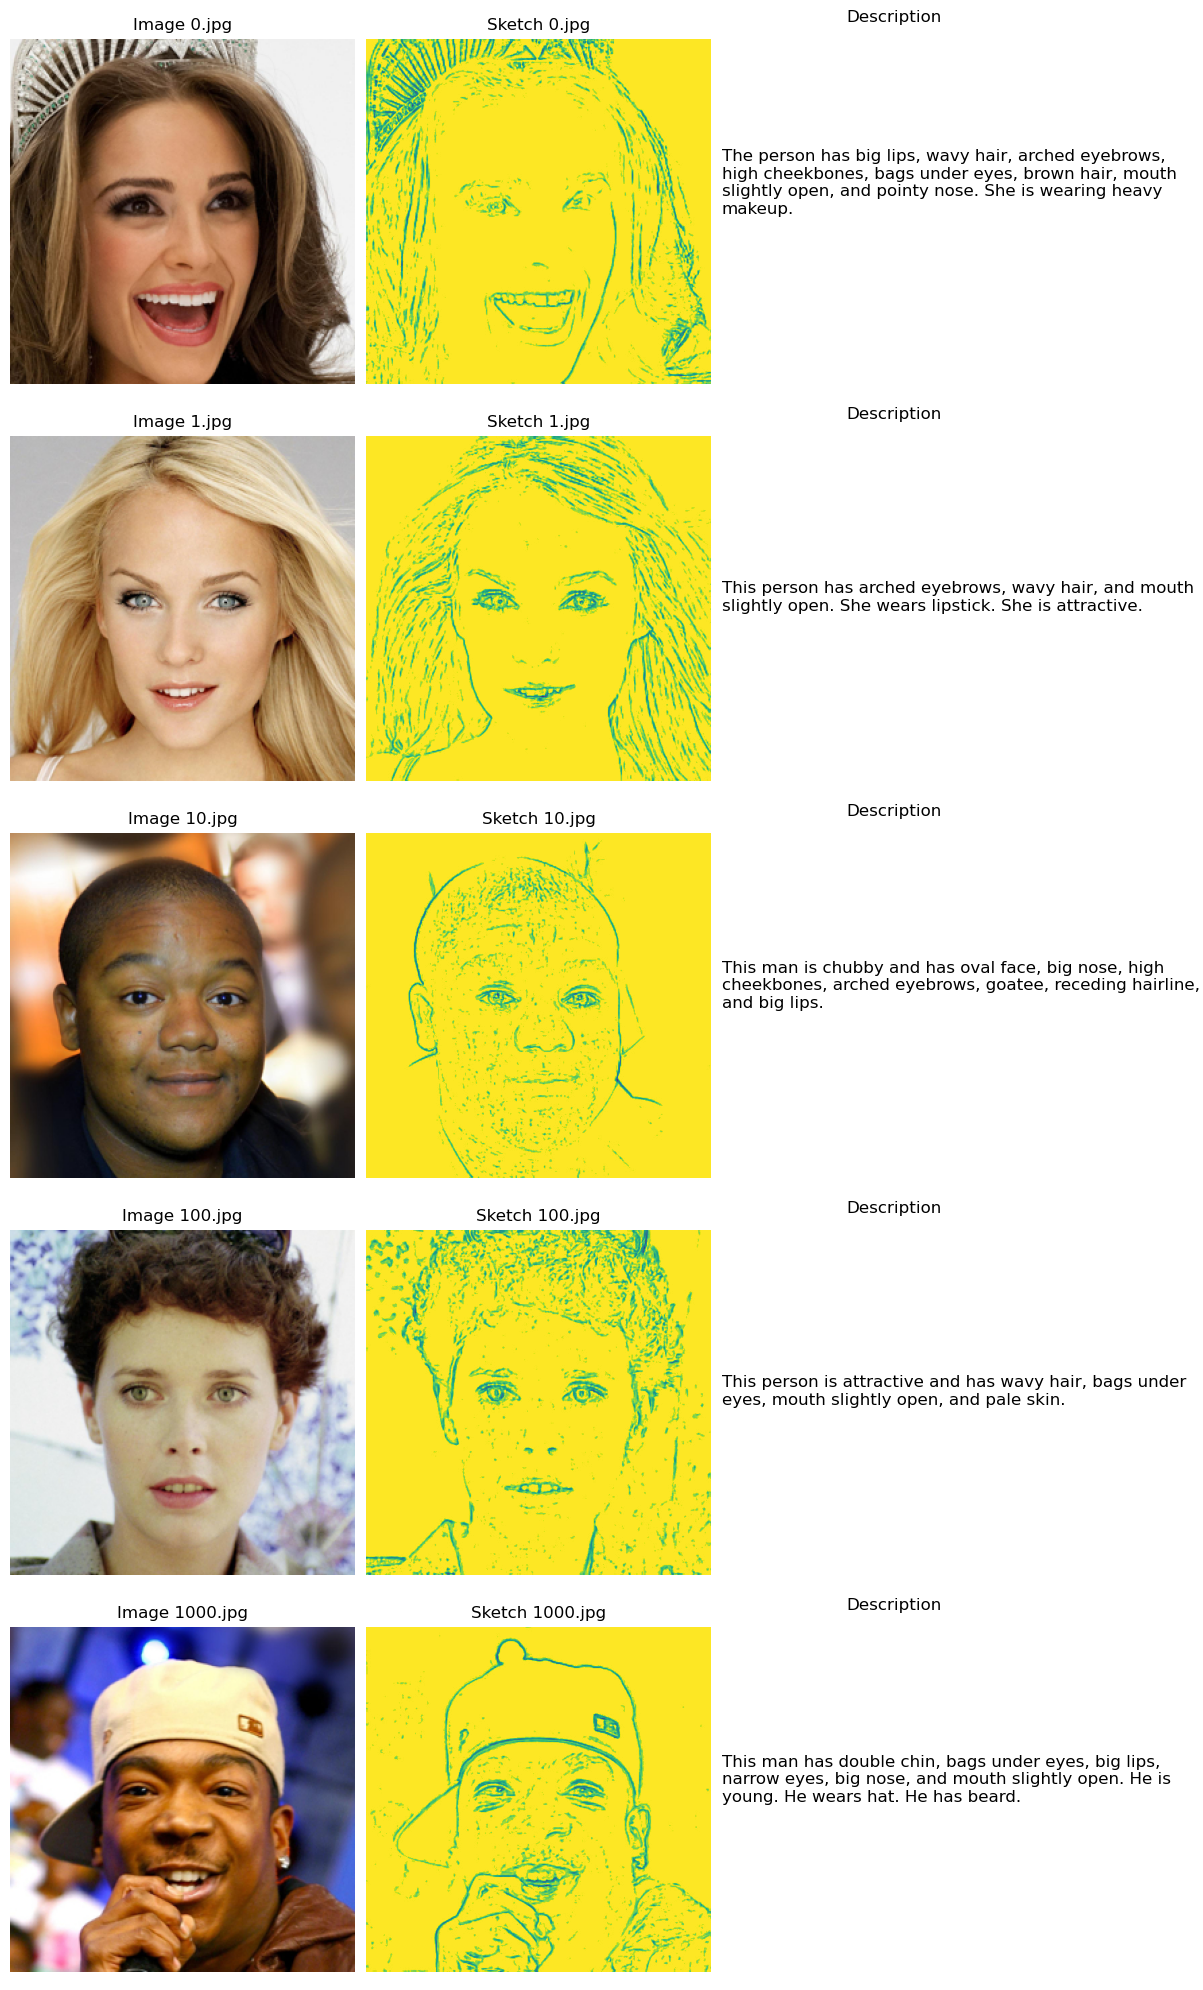

In [2]:
num_samples = 5

# Create a figure to display the images, sketches, and text descriptions
fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 4))

# Loop through a few samples to display
for i in range(num_samples):
    # Retrieve image filename, sketch filename, and text description from the DataFrame
    image_filename = df.iloc[i]['Image Filename']
    sketch_filename = df.iloc[i]['Sketch Filename']
    text_description = df.iloc[i]['Text Description']
    
    # Construct the full file paths
    image_path = os.path.join('./subset/images', image_filename)
    sketch_path = os.path.join('./subset/sketches', sketch_filename)
    
    # Load image and sketch
    img = mpimg.imread(image_path)
    sketch = mpimg.imread(sketch_path)
    
    # Display image, sketch, and text description
    axes[i, 0].imshow(img)
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"Image {image_filename}")
    
    axes[i, 1].imshow(sketch)
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"Sketch {sketch_filename}")
    
    axes[i, 2].text(0, 0.5, text_description, wrap=True, fontsize=12, ha='left')
    axes[i, 2].axis('off')
    axes[i, 2].set_title(f"Description")

plt.tight_layout()
plt.show()


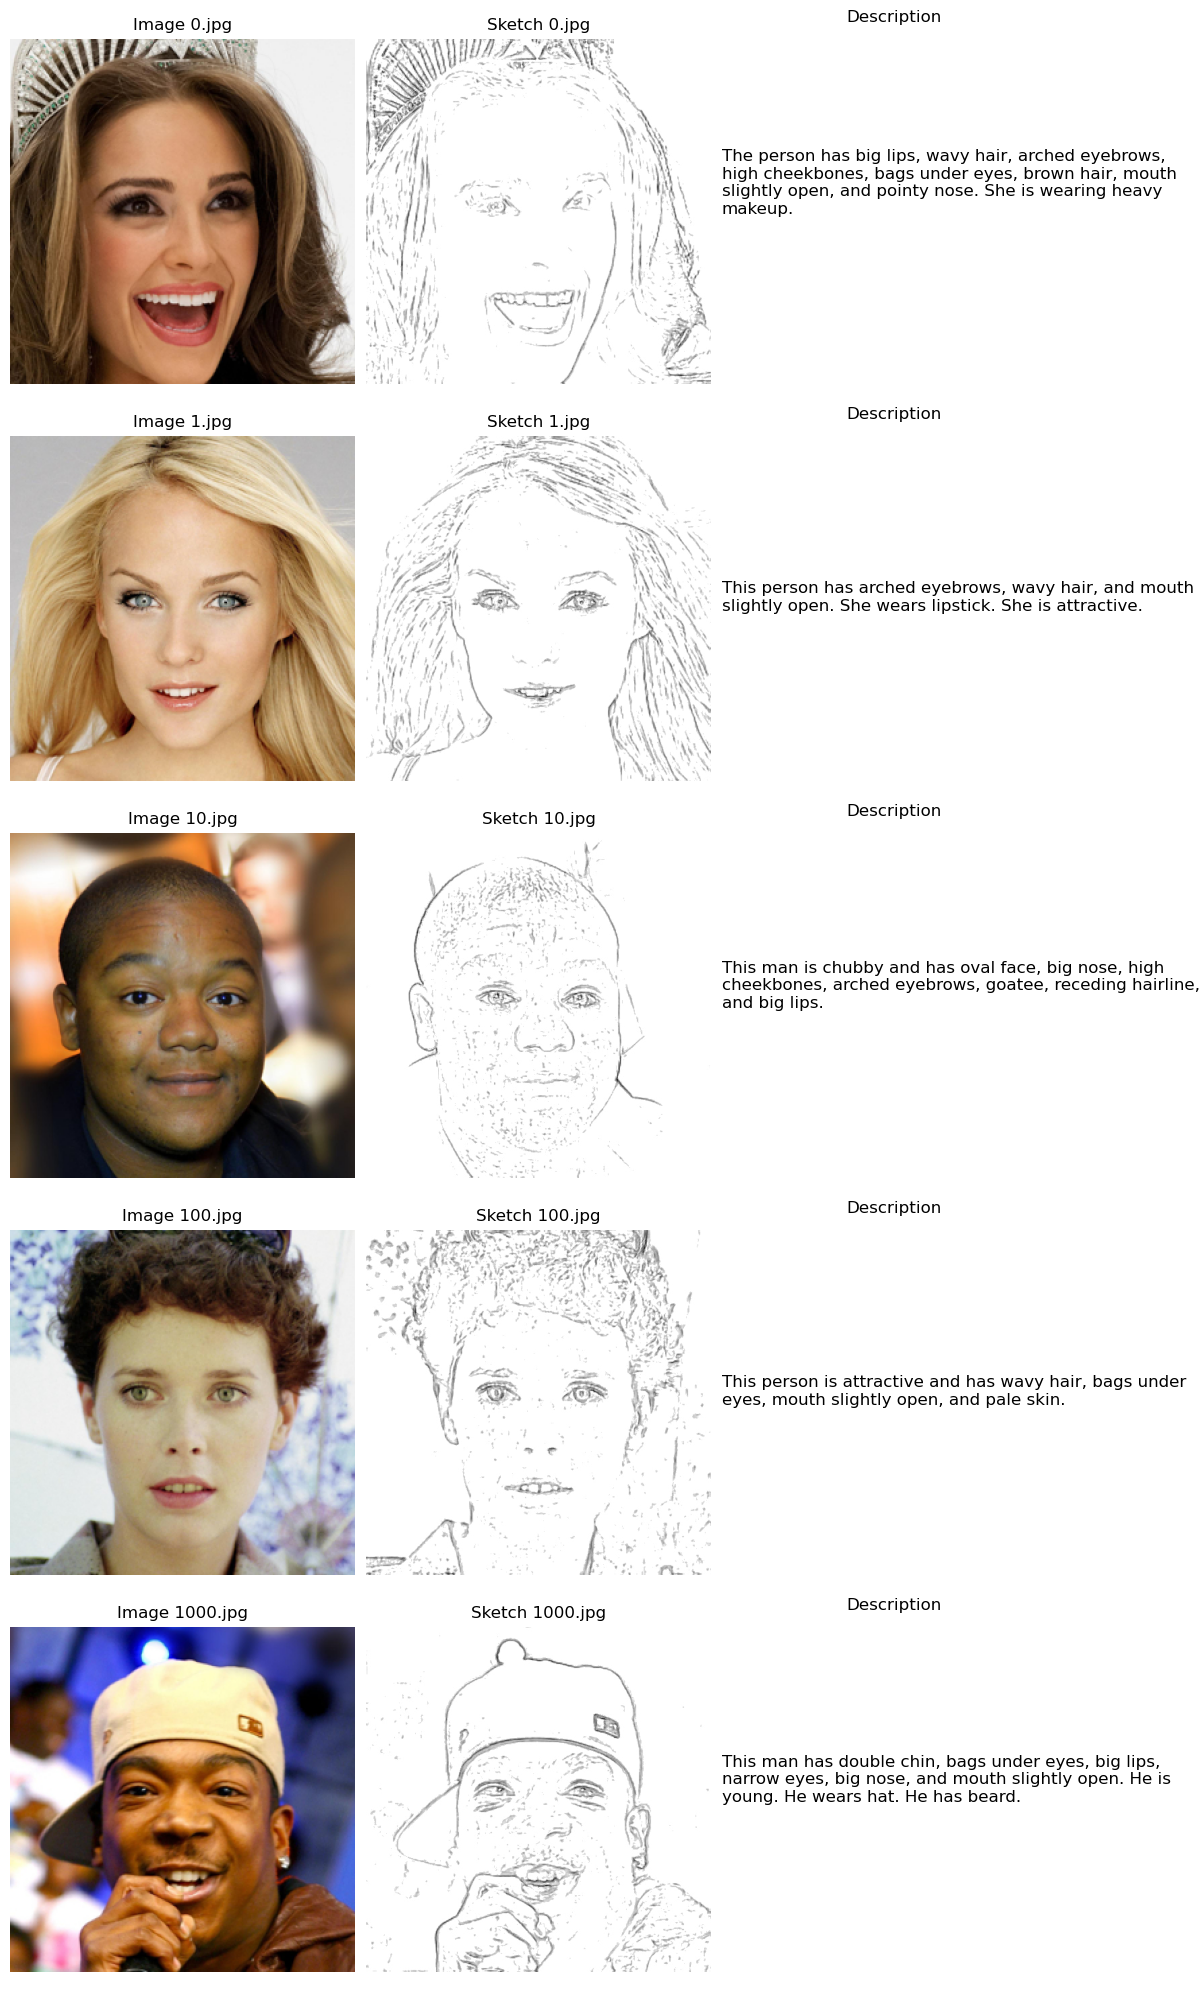

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Number of samples to display
num_samples = 5

# Create a figure to display the images, sketches, and text descriptions
fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 4))

# Loop through a few samples to display
for i in range(num_samples):
    # Retrieve image filename, sketch filename, and text description from the DataFrame
    image_filename = df.iloc[i]['Image Filename']
    sketch_filename = df.iloc[i]['Sketch Filename']
    text_description = df.iloc[i]['Text Description']
    
    # Construct the full file paths
    image_path = os.path.join('./subset/images', image_filename)
    sketch_path = os.path.join('./subset/sketches', sketch_filename)
    
    # Load image and sketch
    img = mpimg.imread(image_path)
    sketch = Image.open(sketch_path).convert('L')  # Convert sketch to grayscale
    
    # Display image, sketch, and text description
    axes[i, 0].imshow(img)
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"Image {image_filename}")
    
    axes[i, 1].imshow(sketch, cmap='gray')  # Display in grayscale
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"Sketch {sketch_filename}")
    
    axes[i, 2].text(0, 0.5, text_description, wrap=True, fontsize=12, ha='left')
    axes[i, 2].axis('off')
    axes[i, 2].set_title(f"Description")

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image

# Path to your image
image_path = './sketches/0.jpg'

# Open the image using PIL
img = Image.open(image_path)

# Get the dimensions (width, height)
width, height = img.size

# Get the number of channels based on the image mode
mode = img.mode
if mode == 'RGB':
    num_channels = 3  # RGB images have 3 channels
elif mode == 'RGBA':
    num_channels = 4  # RGBA images have 4 channels (with alpha)
elif mode == 'L':
    num_channels = 1  # Grayscale images have 1 channel
else:
    num_channels = 'Unknown'  # For other modes like CMYK, etc.

# Print the results
print(f"Image Dimensions: {width} x {height}")
print(f"Number of Channels: {num_channels}")
